## Jung




In [1]:

using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays

In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [3]:

using ParametrizacionMetodo

In [4]:
function Jung(x,y,a)
   
    x_n = x+y
    y_n = y+a*x_n*(x_n-1.)*exp(-x_n)

    return [x_n,y_n]
end

Jung (generic function with 1 method)

In [5]:
function JungI(x,y,a)
   
    y_n = y-a*x*(x-1.)*exp(-x)
    x_n = x -y_n

    return [x_n,y_n]
end

JungI (generic function with 1 method)

In [6]:
jung1(x,y)=Jung(x,y,5.7)
jung2(x,y)=JungI(x,y,5.7)

jung2 (generic function with 1 method)

In [7]:
#Orden = 86 #orden del polinomio
Orden = 10
#a = parse(BigFloat,"3.4") #por si queremos hacerlo con bigfloat
#x_f = parse(BigFloat,"1.")
#y_f= parse(BigFloat,"0.")
x_fijo = [1.,0.] #punto fijo
tiempo = [0.,3.] #tiempo de evaluación del parámetro
delta_t = tiempo[2]/100. #variación del parámetro

W_e, f_e, vec_e, val_e = Inestable(jung2, Orden, x_fijo, tiempo, delta_t) #estable 
W_i, f_i, vec_i, val_i = Inestable(jung1, Orden , x_fijo, tiempo, delta_t) #inestable

(TaylorSeries.Taylor1{Float64}[ 1.0 - 0.8041001387257923 t - 1.9109284365472363e-17 t² + 0.010407195402439237 t³ + 0.0013751833151210374 t⁴ + 8.097546458024914e-5 t⁵ + 3.0440951268470024e-7 t⁶ - 3.6214834065664494e-7 t⁷ - 3.276100477753219e-8 t⁸ - 1.3362785801344348e-9 t⁹ + 7.134305448117721e-12 t¹⁰ + 𝒪(t¹¹¹),  0.5944938745699249 t + 1.7810812140627452e-17 t² - 0.01022285689347774 t³ - 0.0013688338509555628 t⁴ - 8.087800510899237e-5 t⁵ - 3.043140083809359e-7 t⁶ + 3.621187233649149e-7 t⁷ + 3.276030636796955e-8 t⁸ + 1.336271154320015e-9 t⁹ - 7.134295113535985e-12 t¹⁰ + 𝒪(t¹¹¹)], TaylorSeries.Taylor1{Float64}[ 1.0 - 0.20960626415586728 t - 1.29847222484491e-18 t² + 0.00018433850896149896 t³ + 6.349464165474512e-6 t⁴ + 9.745947125676596e-8 t⁵ + 9.55043037642994e-11 t⁶ - 2.9617291730004737e-11 t⁷ - 6.984095626435276e-13 t⁸ - 7.425814420032718e-15 t⁹ + 1.0334581733533077e-17 t¹⁰ + 𝒪(t¹¹¹),  0.15496781322486758 t + 1.2102412850332602e-18 t² - 0.0001810733943391499 t³ - 6.3201475683740765e-6 t

Las vemos graficadas en el espacio fase

In [8]:
function evaluar(Tiempo, paso,A,B,PuntoFijo,col) #función para evaluar los polinomios y graficarlos
    ValX=Float64[]
    
    ValY=Float64[]
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])

    for t = Tiempo[1]:paso:Tiempo[2]
        #x=A(t)
        #y=B(t)
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",marker =",",color=col)
    #title("Espacio Fase")
    legend(loc="upper right",fancybox="true")
    grid("on")
    xlim(-2,2.)
    ylim(-2,2)
    
end

evaluar (generic function with 1 method)

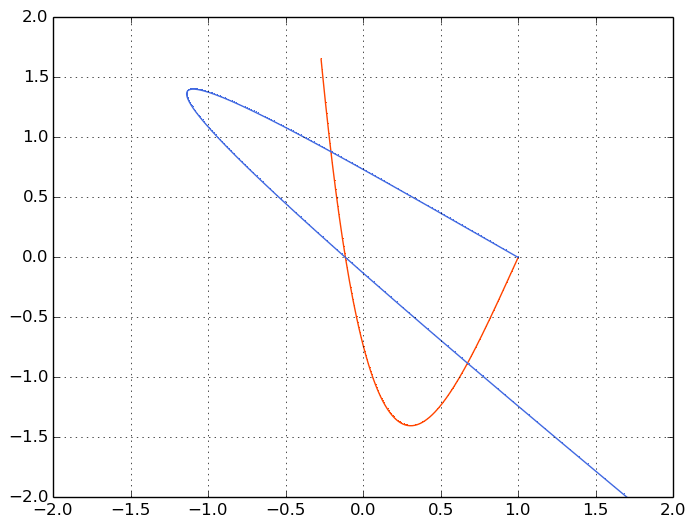

(-2, 2)

In [16]:
evaluar([-.1,-4.], -0.025,  W_e[1],W_e[2],[1.,0.],"orangered")#graficamos en el espacio fase ## -15
evaluar([.1,7.0], 0.025,  W_i[1],W_i[2],[1.,0.],"royalblue") ##23

In [19]:
#calculamos el error
ErrorE = CalculoError(jung2, W_e,f_e,[0.1,7.4],0.025 )# recibe la función, las variedades, el intervalo de evaluación
#del parámetro y el paso
ErrorI = CalculoError(jung1, W_i,f_i,[0.1,7.5],0.025 )


Pol_vec = TaylorSeries.Taylor1{Float64}[ 1.0 + 0.3325166619301202 t - 0.0007359419070784524 t³ + 4.0213668594736015e-5 t⁴ - 9.791964344952789e-7 t⁵ + 1.5222215640067612e-9 t⁶ + 7.488751588402085e-10 t⁷ - 2.8014534674502205e-11 t⁸ + 4.725268401492648e-13 t⁹ + 1.0432405259835982e-15 t¹⁰ + 𝒪(t¹¹¹),  0.9430973807295034 t - 0.04081311517794376 t³ + 0.00866936632903552 t⁴ - 0.0008125988496609701 t⁵ + 4.850392364830075e-6 t⁶ + 9.15619560866723e-6 t⁷ - 1.3140781395100774e-6 t⁸ + 8.503094077356964e-8 t⁹ + 7.201825848670467e-10 t¹⁰ + 𝒪(t¹¹¹)]
Map_vec = TaylorSeries.Taylor1{Float64}[ 1.0 + 0.08667773069557916 t - 1.303544601472125e-5 t³ + 1.8567360794536866e-7 t⁴ - 1.1785294132362719e-9 t⁵ + 4.77576109164865e-13 t⁶ + 6.124466487962587e-14 t⁷ - 5.972228265068373e-16 t⁸ + 2.6258793627650215e-18 t⁹ + 1.5112010089019005e-21 t¹⁰ - 7.673066374459331e-10 t¹¹ + 8.451018815048263e-11 t¹² - 4.249729444479272e-12 t¹³ - 8.737564911894977e-14 t¹⁴ + 3.6154327041672574e-14 t¹⁵ - 3.310490691867591e-15 t¹⁶ + 1.36

2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  7.275, 7.3, 7.325, 7.35, 7.375, 7.4, 7.425, 7.45, 7.475, 7.5]                                                                                                              
 [1.94307e-17, 2.42897e-17, 2.91495e-17, 3.40104e-17, 3.88724e-17, 4.37358e-17, 4.86007e-17, 5.34672e-17, 5.83356e-17, 6.3206e-17  …  0.0228709, 0.02378, 0.024722, 0.0256979, 0.0267089, 0.027756, 0.0288404, 0.0299633, 0.031126, 0.0323298]

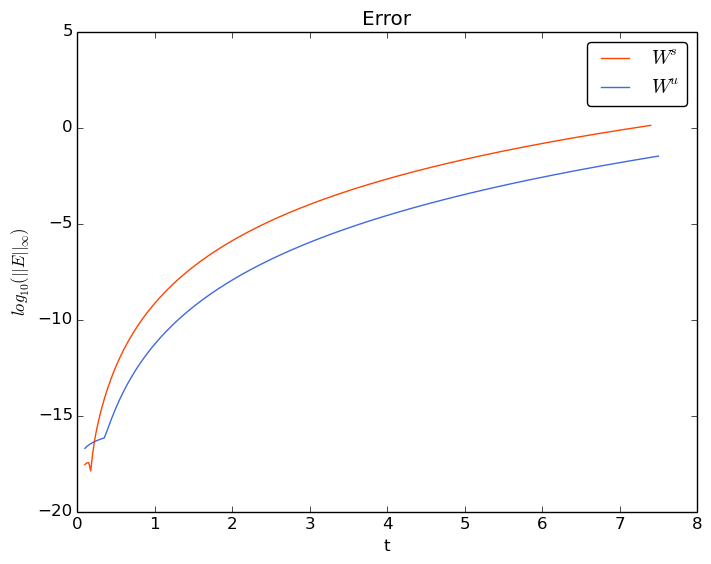

PyObject <matplotlib.legend.Legend object at 0x7f3b936b79d0>

In [20]:
#graficamos el error
plot(ErrorE[1],log10.(ErrorE[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorI[1],log10.(ErrorI[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Iteramos el polinomio primero

In [66]:
W_e1=jung1(W_e[1],W_e[2])
W_i1=jung2(W_i[1],W_i[2])

2-element Array{TaylorSeries.Taylor1{Float64},1}:
  1.0 - 3.0847218984735627 t - 3.6920096506099815e-17 t² + 0.5875588164118969 t³ + 0.29784074701458685 t⁴ + 0.06727951403216666 t⁵ + 0.0009702719957167045 t⁶ - 0.004428204369121779 t⁷ - 0.0015367536348887092 t⁸ - 0.00024046391987778544 t⁹ + 4.925048302816354e-6 t¹⁰ + 1.2689161646395178e-5 t¹¹ + 3.379634761687442e-6 t¹² + 4.1097812531367215e-7 t¹³ - 2.043358482355374e-8 t¹⁴ - 2.044613184724448e-8 t¹⁵ - 4.527307266792567e-9 t¹⁶ - 4.5225180343301577e-10 t¹⁷ + 3.430123383754298e-11 t¹⁸ + 2.237257136945116e-11 t¹⁹ + 4.315178226144095e-12 t²⁰ + 3.6576479911791623e-13 t²¹ - 3.667865127061109e-14 t²² - 1.8410729730818557e-14 t²³ - 3.1865624147107415e-15 t²⁴ - 2.3419026758803034e-16 t²⁵ + 2.897253052099126e-17 t²⁶ + 1.2128467024609131e-17 t²⁷ + 1.9226325703501414e-18 t²⁸ + 1.2447089776672227e-19 t²⁹ - 1.8229157606207842e-20 t³⁰ - 6.6678568634233364e-21 t³¹ - 9.825858149072935e-22 t³² - 5.67447681313227e-23 t³³ + 9.565536607553791e-24 t³⁴ + 3.150

Evaluamos el polinomio iterado

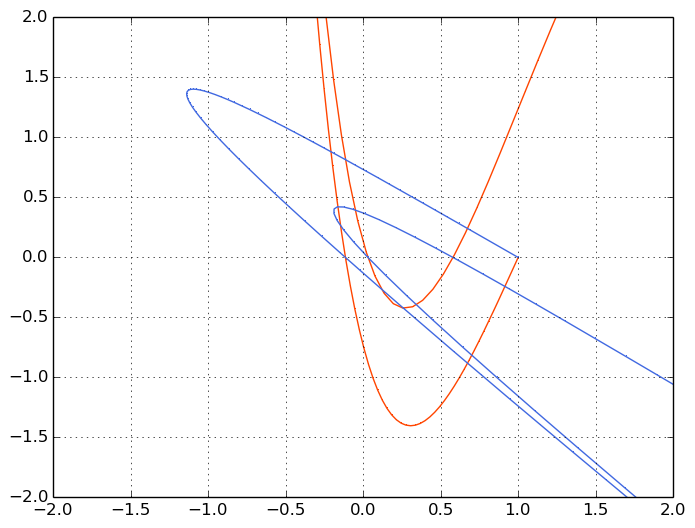

(-2, 2)

In [67]:
evaluar([-0.1, -7.], -0.025,  W_e1[1],W_e1[2],[1.,0.],"orangered")#graficamos en el espacio fase ## -15
evaluar([.1, 40.], 0.025,  W_i1[1],W_i1[2],[1.,0.],"royalblue") ##23

Calculamos el error asociado al polinomio iterado

In [54]:
W_i[1]

1.0 - 0.8041001387257923 t - 1.9109284365472363e-17 t² + 0.010407195402439237 t³ + 0.0013751833151210374 t⁴ + 8.097546458024914e-5 t⁵ + 3.0440951268470024e-7 t⁶ - 3.6214834065664494e-7 t⁷ - 3.276100477753219e-8 t⁸ - 1.3362785801344348e-9 t⁹ + 7.134305448117721e-12 t¹⁰ + 𝒪(t¹¹¹)

In [55]:
W_i1[1]

1.0 - 0.20960626415586747 t - 1.298472224844911e-18 t² + 0.00018433850896149712 t³ + 6.349464165474614e-6 t⁴ + 9.745947125677334e-8 t⁵ + 9.550430376433566e-11 t⁶ - 2.961729173002661e-11 t⁷ - 6.984095626422692e-13 t⁸ - 7.425814419789373e-15 t⁹ + 1.0334581735788509e-17 t¹⁰ + 𝒪(t¹¹¹)

In [53]:
val_xe = W_e1[1]-W_e[1]
#val_ye = W_e1[2]-W_e[2]
#val_xi = W_i1[1]-W_i[1]
#val_yi = W_i1[2]-W_i[2]

- 0.24583893123454104 t + 0.0007229064610637312 t³ - 4.0027994986790646e-5 t⁴ + 9.780179050820426e-7 t⁵ - 1.5217439878975963e-9 t⁶ - 7.488139141753288e-10 t⁷ + 2.80139374516757e-11 t⁸ - 4.725242142699021e-13 t⁹ - 1.0432390147825893e-15 t¹⁰ - 7.673066374459331e-10 t¹¹ + 8.451018815048263e-11 t¹² - 4.249729444479272e-12 t¹³ - 8.737564911894977e-14 t¹⁴ + 3.6154327041672574e-14 t¹⁵ - 3.310490691867591e-15 t¹⁶ + 1.3675272295914193e-16 t¹⁷ + 4.2891248925988094e-18 t¹⁸ - 1.1568528674983363e-18 t¹⁹ + 9.227078979037762e-20 t²⁰ - 3.234228369644608e-21 t²¹ - 1.3411748717685916e-22 t²² + 2.783853186290932e-23 t²³ - 1.992512385469418e-24 t²⁴ + 6.055509895109213e-26 t²⁵ + 3.097929850419881e-27 t²⁶ - 5.362833789842378e-28 t²⁷ + 3.515507230835586e-29 t²⁸ - 9.411585616489682e-31 t²⁹ - 5.699868681786241e-32 t³⁰ + 8.621598490031119e-33 t³¹ - 5.253821223204704e-34 t³² + 1.2546826749383819e-35 t³³ + 8.746225865481105e-37 t³⁴ - 1.1912540982578475e-37 t³⁵ + 6.824930527896642e-39 t³⁶ - 1.4694843855546558e-40 t³⁷ - 1.1544917146018215e-41 t³⁸ + 1.445767547154754e-42 t³⁹ - 7.857269043989701e-44 t⁴⁰ + 1.5398634588457888e-45 t⁴¹ + 1.3404505878471207e-46 t⁴² - 1.5671609986045684e-47 t⁴³ + 8.137797567939352e-49 t⁴⁴ - 1.4645994876173367e-50 t⁴⁵ - 1.392146973204178e-51 t⁴⁶ + 1.5372904538267e-52 t⁴⁷ - 7.67317385855565e-54 t⁴⁸ + 1.279073290483895e-55 t⁴⁹ + 1.31029049514083e-56 t⁵⁰ - 1.379186612593558e-57 t⁵¹ + 6.650745956288795e-59 t⁵² - 1.0354475191115208e-60 t⁵³ - 1.1293695141296144e-61 t⁵⁴ + 1.1415355228473176e-62 t⁵⁵ - 5.3413998436617486e-64 t⁵⁶ + 7.831314558301882e-66 t⁵⁷ + 8.990773990790785e-67 t⁵⁸ - 8.780174463157752e-68 t⁵⁹ + 4.001564999785856e-69 t⁶⁰ - 5.570275111366832e-71 t⁶¹ - 6.657807246263626e-72 t⁶² + 6.314300858993684e-73 t⁶³ - 2.812262636497694e-74 t⁶⁴ + 3.746804028000674e-76 t⁶⁵ + 4.613558643771781e-77 t⁶⁶ - 4.2680703617834067e-78 t⁶⁷ + 1.863135403867119e-79 t⁶⁸ - 2.3945076561587967e-81 t⁶⁹ - 3.0069685154022634e-82 t⁷⁰ + 2.7238806690443144e-83 t⁷¹ - 1.1684878964297342e-84 t⁷² + 1.4596622203273517e-86 t⁷³ + 1.8514945900486134e-87 t⁷⁴ - 1.647814938579964e-88 t⁷⁵ + 6.962941126678783e-90 t⁷⁶ - 8.515498888352991e-92 t⁷⁷ - 1.0811396729843222e-92 t⁷⁸ + 9.481960065223225e-94 t⁷⁹ - 3.955086189820418e-95 t⁸⁰ + 4.767637486450915e-97 t⁸¹ + 6.007143044401928e-98 t⁸² - 5.205819029959162e-99 t⁸³ + 2.147631966376511e-100 t⁸⁴ - 2.5677690671682685e-102 t⁸⁵ - 3.1854582204941684e-103 t⁸⁶ + 2.7344319312289606e-104 t⁸⁷ - 1.1176744944194256e-105 t⁸⁸ + 1.3330179566503978e-107 t⁸⁹ + 1.616372097665259e-108 t⁹⁰ - 1.3775078476339788e-109 t⁹¹ + 5.587511024421709e-111 t⁹² - 6.68164918503058e-113 t⁹³ - 7.866874119427712e-114 t⁹⁴ + 6.669996729684676e-115 t⁹⁵ - 2.6888498164139784e-116 t⁹⁶ + 3.238450110809441e-118 t⁹⁷ + 3.68023845281769e-119 t⁹⁸ - 3.110469175918734e-120 t⁹⁹ + 1.2478786706063387e-121 t¹⁰⁰ - 1.5196870563189307e-123 t¹⁰¹ - 1.6580353361976237e-124 t¹⁰² + 1.3995219512904735e-125 t¹⁰³ - 5.594672085801878e-127 t¹⁰⁴ + 6.912402631868839e-129 t¹⁰⁵ + 7.206230591213828e-130 t¹⁰⁶ - 6.085588303957487e-131 t¹⁰⁷ + 2.426876949132187e-132 t¹⁰⁸ - 3.0507556727859096e-134 t¹⁰⁹ - 3.026234097630929e-135 t¹¹⁰ + 𝒪(t¹¹¹)

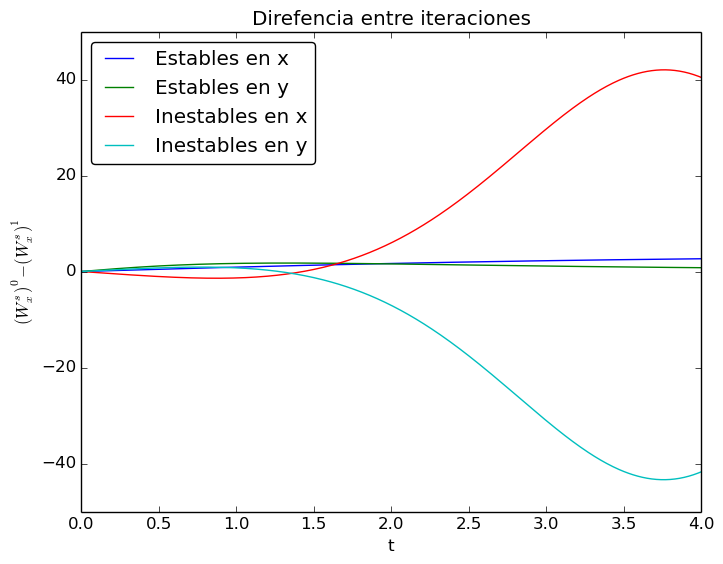

PyObject <matplotlib.legend.Legend object at 0x7f3b8dfcd290>

In [42]:
listat = []
lista_ex = []
lista_ey = []
lista_ix = []
lista_iy = []

for t in 0.:1e-2:4.  
    val_xe = W_e1[1]-W_e[1]
    val_ye = W_e1[2]-W_e[2]
    val_xi = W_i1[1]-W_i[1]
    val_yi = W_i1[2]-W_i[2]
    push!(listat,t)
    push!(lista_ex,val_xe(t))
    push!(lista_ey,val_ye(t))
    push!(lista_ix,val_xi(t))
    push!(lista_iy,val_yi(t))
end
plot(listat,lista_ex,label="Estables en x")
plot(listat,lista_ey,label="Estables en y")
plot(listat,lista_ix,label="Inestables en x")
plot(listat,lista_iy,label="Inestables en y")
xlabel("t")
ylabel(L"(W_{x}^{s})^{0}-(W_{x}^{s})^{1}")
title("Direfencia entre iteraciones")
legend(loc="low right",fancybox="true" )

In [25]:
#calculamos el error
ErrorE1 = CalculoError(jung2, W_e1,f_e,[0.1,7.4],0.025 )# recibe la función, las variedades, el intervalo de evaluación
#del parámetro y el paso
ErrorI1 = CalculoError(jung1, W_i1,f_i,[0.1,7.5],0.025 )


Pol_vec = TaylorSeries.Taylor1{Float64}[ 1.0 + 1.2756140426596236 t - 0.04154905708502221 t³ + 0.008709579997630256 t⁴ - 0.0008135780460954655 t⁵ + 4.851914586394082e-6 t⁶ + 9.15694448382607e-6 t⁷ - 1.3141061540447519e-6 t⁸ + 8.50314133004098e-8 t⁹ + 7.201836281075726e-10 t¹⁰ + 𝒪(t¹¹¹),  3.6179488133646838 t - 4.440892098500626e-16 t² - 2.304185202712211 t³ + 1.877633705405874 t⁴ - 0.6751582839528769 t⁵ + 0.015460094654493942 t⁶ + 0.11195828020450525 t⁷ - 0.06164079432645578 t⁸ + 0.015301355296177533 t⁹ + 0.0004971659880713704 t¹⁰ - 0.0020320464420593167 t¹¹ + 0.0008585777361148392 t¹² - 0.0001656295093616628 t¹³ - 1.306389641262703e-5 t¹⁴ + 2.073712161456578e-5 t¹⁵ - 7.284276842855373e-6 t¹⁶ + 1.154345818211291e-6 t¹⁷ + 1.388911338448096e-7 t¹⁸ - 1.4371094256129118e-7 t¹⁹ + 4.397256786716795e-8 t²⁰ - 5.912813103072842e-9 t²¹ - 9.40621187031457e-10 t²² + 7.48999549156217e-10 t²³ - 2.0565635657348996e-10 t²⁴ + 2.397715802183478e-11 t²⁵ + 4.705702273876288e-12 t²⁶ - 3.1250220313767086e-1

Pol_vec = TaylorSeries.Taylor1{Float64}[ 1.0 - 3.0847218984735627 t - 3.6920096506099815e-17 t² + 0.5875588164118969 t³ + 0.29784074701458685 t⁴ + 0.06727951403216666 t⁵ + 0.0009702719957167045 t⁶ - 0.004428204369121779 t⁷ - 0.0015367536348887092 t⁸ - 0.00024046391987778544 t⁹ + 4.925048302816354e-6 t¹⁰ + 1.2689161646395178e-5 t¹¹ + 3.379634761687442e-6 t¹² + 4.1097812531367215e-7 t¹³ - 2.043358482355374e-8 t¹⁴ - 2.044613184724448e-8 t¹⁵ - 4.527307266792567e-9 t¹⁶ - 4.5225180343301577e-10 t¹⁷ + 3.430123383754298e-11 t¹⁸ + 2.237257136945116e-11 t¹⁹ + 4.315178226144095e-12 t²⁰ + 3.6576479911791623e-13 t²¹ - 3.667865127061109e-14 t²² - 1.8410729730818557e-14 t²³ - 3.1865624147107415e-15 t²⁴ - 2.3419026758803034e-16 t²⁵ + 2.897253052099126e-17 t²⁶ + 1.2128467024609131e-17 t²⁷ + 1.9226325703501414e-18 t²⁸ + 1.2447089776672227e-19 t²⁹ - 1.8229157606207842e-20 t³⁰ - 6.6678568634233364e-21 t³¹ - 9.825858149072935e-22 t³² - 5.67447681313227e-23 t³³ + 9.565536607553791e-24 t³⁴ + 3.15057470826419

2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  7.275, 7.3, 7.325, 7.35, 7.375, 7.4, 7.425, 7.45, 7.475, 7.5]                                                                                    
 [1.12223, 1.37079, 1.59484, 1.78702, 1.93905, 2.04174, 2.08496, 2.05774, 1.94833, 1.74433  …  5.43866e66, 7.9521e66, 1.16117e67, 1.69332e67, 2.46613e67, 3.58698e67, 5.21056e67, 7.55933e67, 1.0953e68, 1.58501e68]

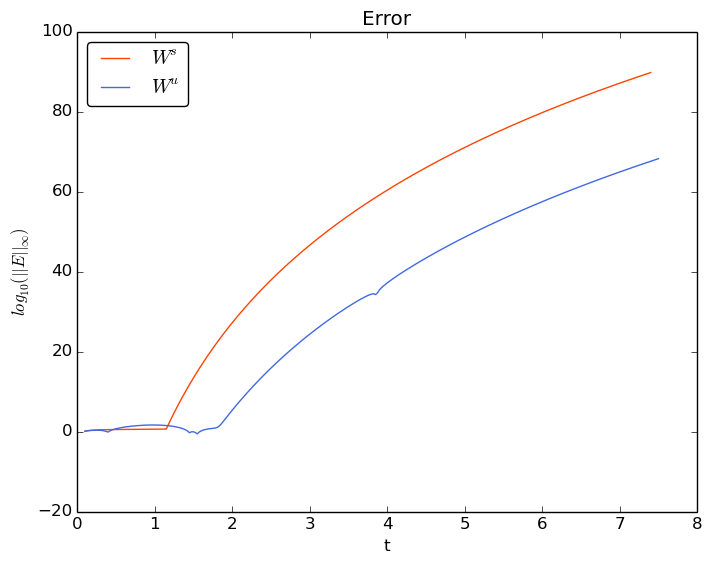

PyObject <matplotlib.legend.Legend object at 0x7f3b937ad110>

In [26]:
#graficamos el error
plot(ErrorE1[1],log10.(ErrorE1[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorI1[1],log10.(ErrorI1[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

In [22]:
W_e2=jung1(W_e1[1],W_e1[2])
W_i2=jung2(W_i1[1],W_i1[2])

2-element Array{TaylorSeries.Taylor1{Float64},1}:
  1.0 - 11.833736536845993 t - 5.473090864672727e-17 t² + 33.17179599245683 t³ + 64.50711669258393 t⁴ + 55.90005604621876 t⁵ + 3.092635763479978 t⁶ - 54.146303415761096 t⁷ - 72.08605933732797 t⁸ - 43.27158844166603 t⁹ + 3.3999246263654985 t¹⁰ + 33.604564860354515 t¹¹ + 34.335272423628766 t¹² + 16.01713693004418 t¹³ - 3.05625277942311 t¹⁴ - 11.728986320487577 t¹⁵ - 9.962927011467462 t¹⁶ - 3.8174330593614627 t¹⁷ + 1.112080102800983 t¹⁸ + 2.7809338326024715 t¹⁹ + 2.057471688413532 t²⁰ + 0.6686828429001919 t²¹ - 0.2579497944919264 t²² - 0.49611900851524404 t²³ - 0.3293093887563609 t²⁴ - 0.09271881997621005 t²⁵ + 0.04423869301434715 t²⁶ + 0.07089811065379663 t²⁷ + 0.043084081570737794 t²⁸ + 0.010668875738787538 t²⁹ - 0.006049787141013515 t³⁰ - 0.008461532889435802 t³¹ - 0.004776905248238544 t³² - 0.0010524210341971928 t³³ + 0.0006908049300479074 t³⁴ + 0.0008686469568891914 t³⁵ + 0.0004606242295364602 t³⁶ + 9.112791830845129e-5 t³⁷ - 6.794250

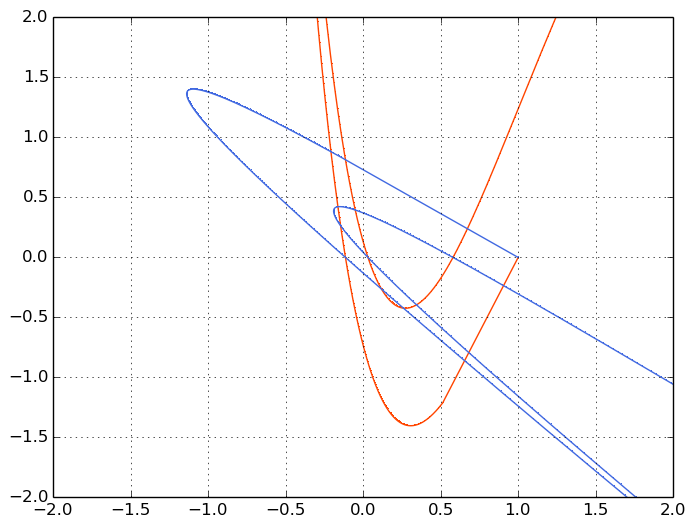

(-2, 2)

In [33]:
evaluar([-.1,-7.], -1e-3,  W_e2[1],W_e2[2],[1.,0.],"orangered")#graficamos en el espacio fase ## -15
evaluar([.1,7.0], 1e-3,  W_i2[1],W_i2[2],[1.,0.],"royalblue") ##23

In [12]:
#para calcular la intersección
function Interseccion(p)
    (x,y)=p
    V=SVector(( W_e[1](x)-W_i[1](y), W_e[2](x)-W_i[2](y) ))

end

Interseccion (generic function with 1 method)

In [54]:
X = (-4.0..(-0.1))×(0.1..7.0) # 2D IntervalBox;

In [55]:
Interseccion(X)

2-element StaticArrays.SArray{Tuple{2},IntervalArithmetic.Interval{Float64},1,2}:
 [-3.96529, 5.59618]
 [-7.93146, 5.92955]

In [59]:
@time(
r=roots(Interseccion,X, Newton,1e-4))

  0.133250 seconds (6.60 k allocations: 329.014 KiB)


3-element Array{IntervalRootFinding.Root{IntervalArithmetic.IntervalBox{2,Float64}},1}:
 Root([-0.985068, -0.985067] × [5.99488, 5.99489], :unique)
 Root([-3.46215, -3.46214] × [5.49229, 5.4923], :unique)   
 Root([-3.77896, -3.77895] × [1.56269, 1.5627], :unique)   

In [76]:
nombre = ["a","b","c","d","e","f","g","h"]
for ind in eachindex(r)
    plot(W_e[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         W_e[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]), "o") #, label=nombre[ind])
end
#legend(loc="lower right",fancybox="true" )

evaluar([-.1,-4.4], -0.025,  W_e[1],W_e[2],[1.,0.],"orangered")#graficamos en el espacio fase ## -15
evaluar([.1,7.0], 0.025,  W_i[1],W_i[2],[1.,0.],"royalblue") ##23

(-2, 2)

In [78]:
intervaloX = hull(W_e[1](r[3].interval[1]),W_i[1](r[3].interval[2]))
intervaloY = hull(W_e[2](r[3].interval[1]),W_i[2](r[3].interval[2]))

[0.881091, 0.881092]

In [65]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch